<a href="https://colab.research.google.com/github/cybermin/pythonbasic/blob/master/work/08/ex27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas 시각화

#### 시각화 모듈 및 한글 처리

In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 

In [4]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings(action='ignore') 

#### 부산시 기온 데이터 불러오기

In [6]:
df = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/05/부산시기온.csv')
df.head()

,일시,평균,최고,최저
0,2017-01-01,4.1,15.1,-7.7
1,2017-02-01,5.5,17.7,-5.7
2,2017-03-01,9.0,18.1,-2.3
3,2017-04-01,15.0,23.2,5.0
4,2017-05-01,19.0,28.2,12.8


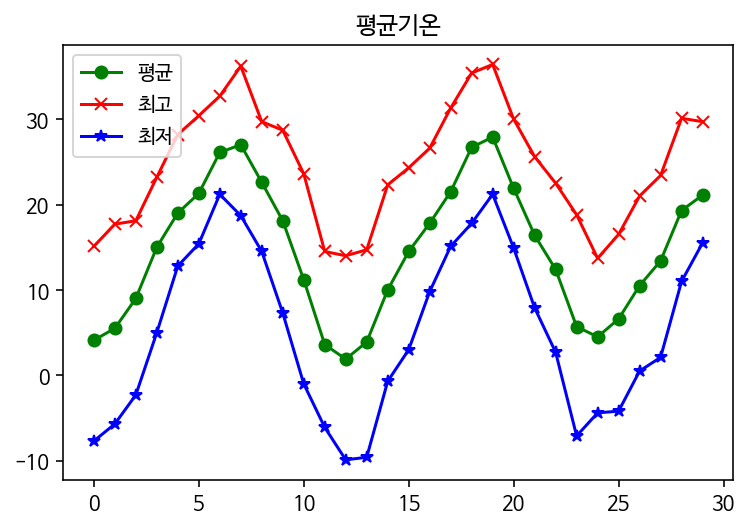

In [11]:
plt.plot(df['평균'], 'go-', label='평균')
plt.plot(df['최고'], 'rx-', label='최고')
plt.plot(df['최저'], 'b*-', label='최저')
plt.title('평균기온')
plt.legend()
plt.show()

### matplotlib 라이브러리 사용

##### 기본 그래프 그리기
+ 기본 그리기
+ 특정 열만 그리기
+ xticks를 이용하여 x축 변경하기
+ index를 변경하여 x축 변경하기
+ 그래프 크기 변경하기
 - .plot(figsize=(가로,세로))

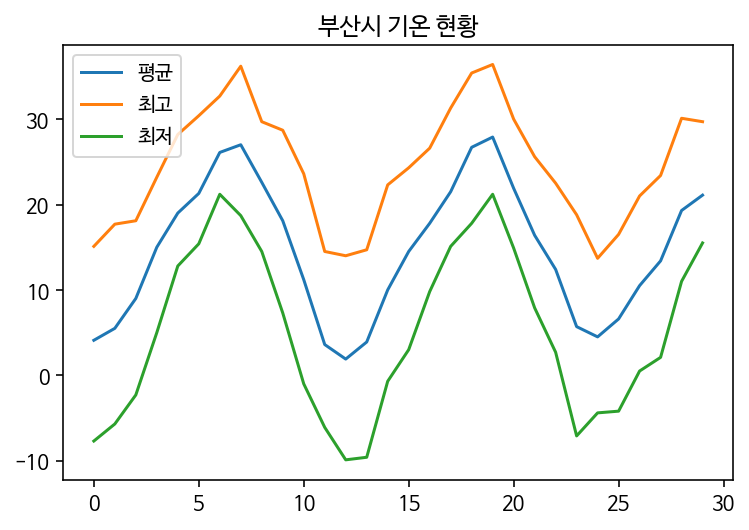

In [ ]:
#기본 그래프
df.plot()
plt.title('부산시 기온 현황')
plt.legend()
plt.show()

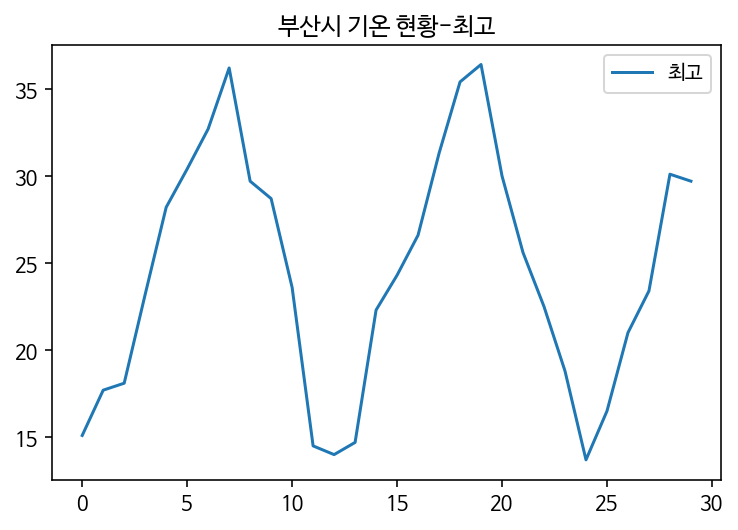

In [ ]:
#특정 항목 그래프
df['최고'].plot()
plt.title('부산시 기온 현황-최고')
plt.legend()
plt.show()

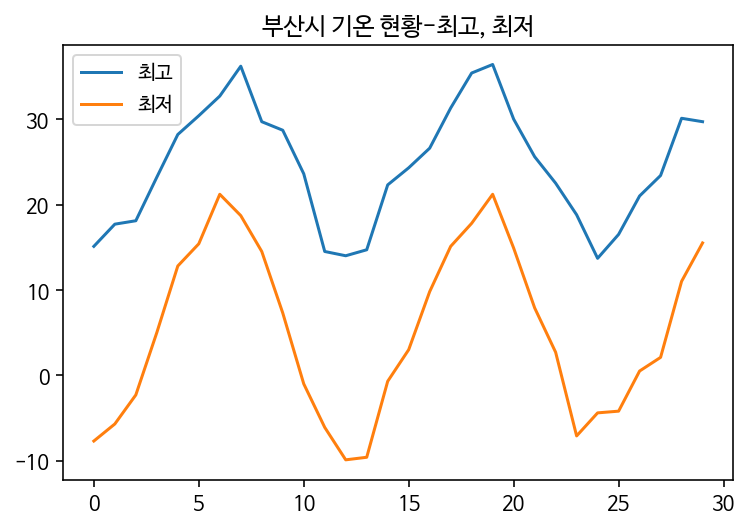

In [ ]:
#특정 항목 그래프
df[['최고','최저']].plot()
plt.title('부산시 기온 현황-최고, 최저')
plt.legend()
plt.show()

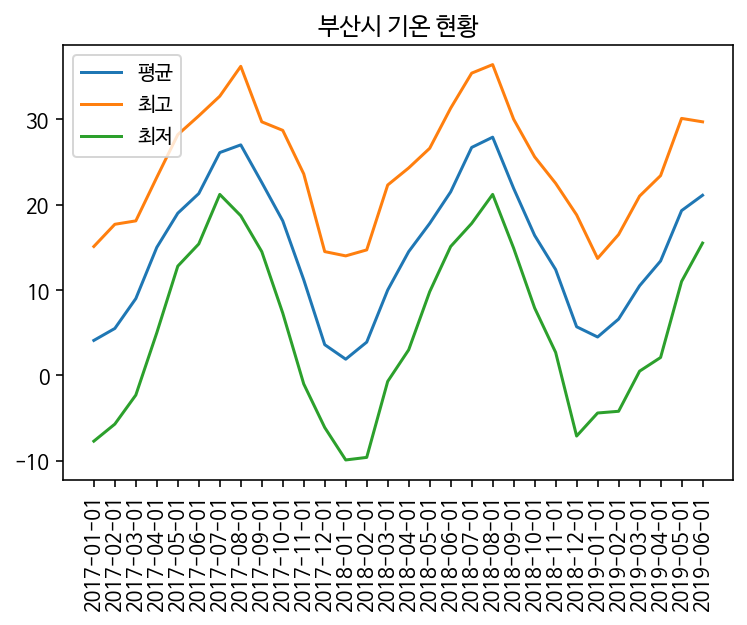

In [12]:
#x축지정하기 
df.plot()
plt.title('부산시 기온 현황') 
plt.xticks(df.index, df['일시'], rotation=90)
plt.show()

In [ ]:
#인덱스를 변경하여 작성 
df = df.set_index('일시')
df.head()

,평균,최고,최저
일시,,,
2017-01-01,4.1,15.1,-7.7
2017-02-01,5.5,17.7,-5.7
2017-03-01,9.0,18.1,-2.3
2017-04-01,15.0,23.2,5.0
2017-05-01,19.0,28.2,12.8


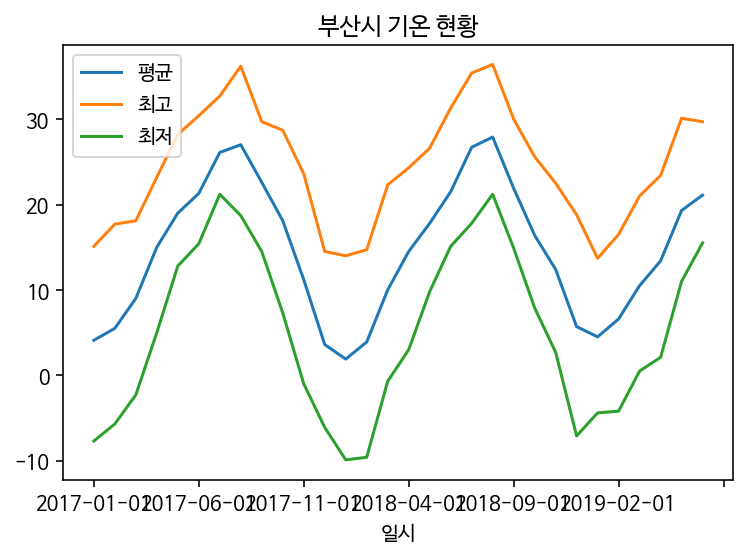

In [ ]:
df.plot()
plt.title('부산시 기온 현황')
plt.legend()
plt.show()

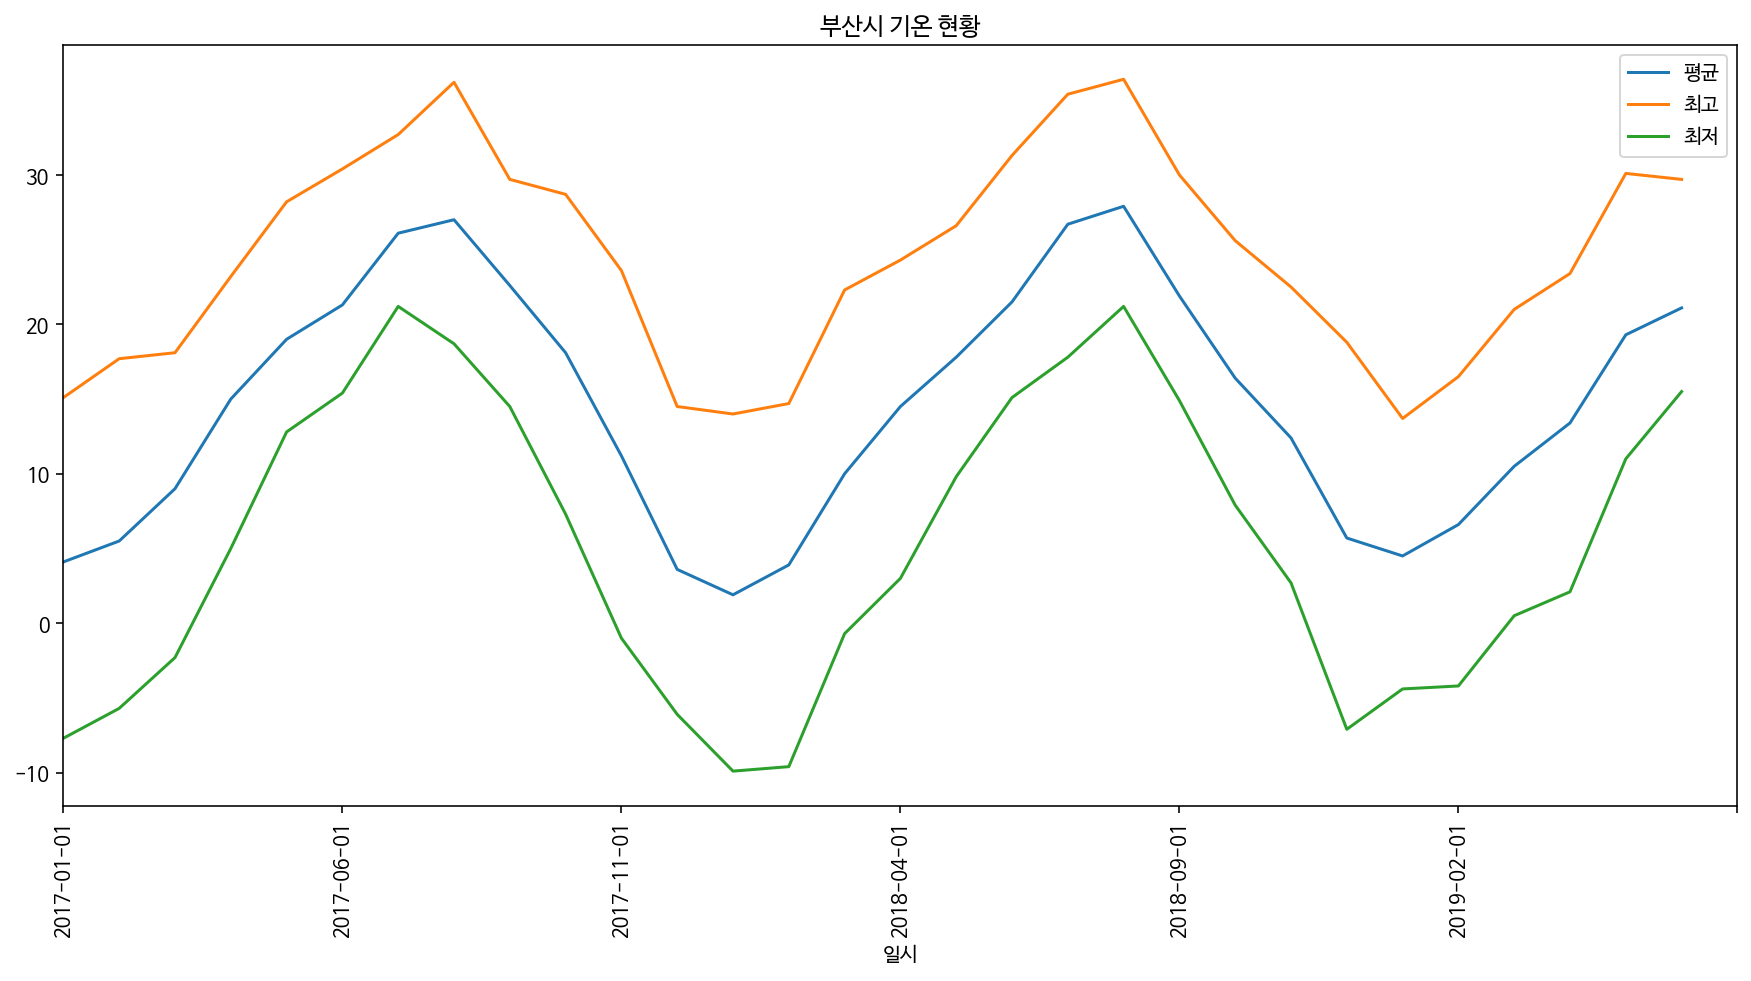

In [ ]:
#그림 그기 변경 
df.plot(figsize=(15, 7))

plt.title('부산시 기온 현황')
plt.xlim(0, len(df.index))
plt.xticks(rotation=90)
plt.show()

##### 여러개 그래프 그리기

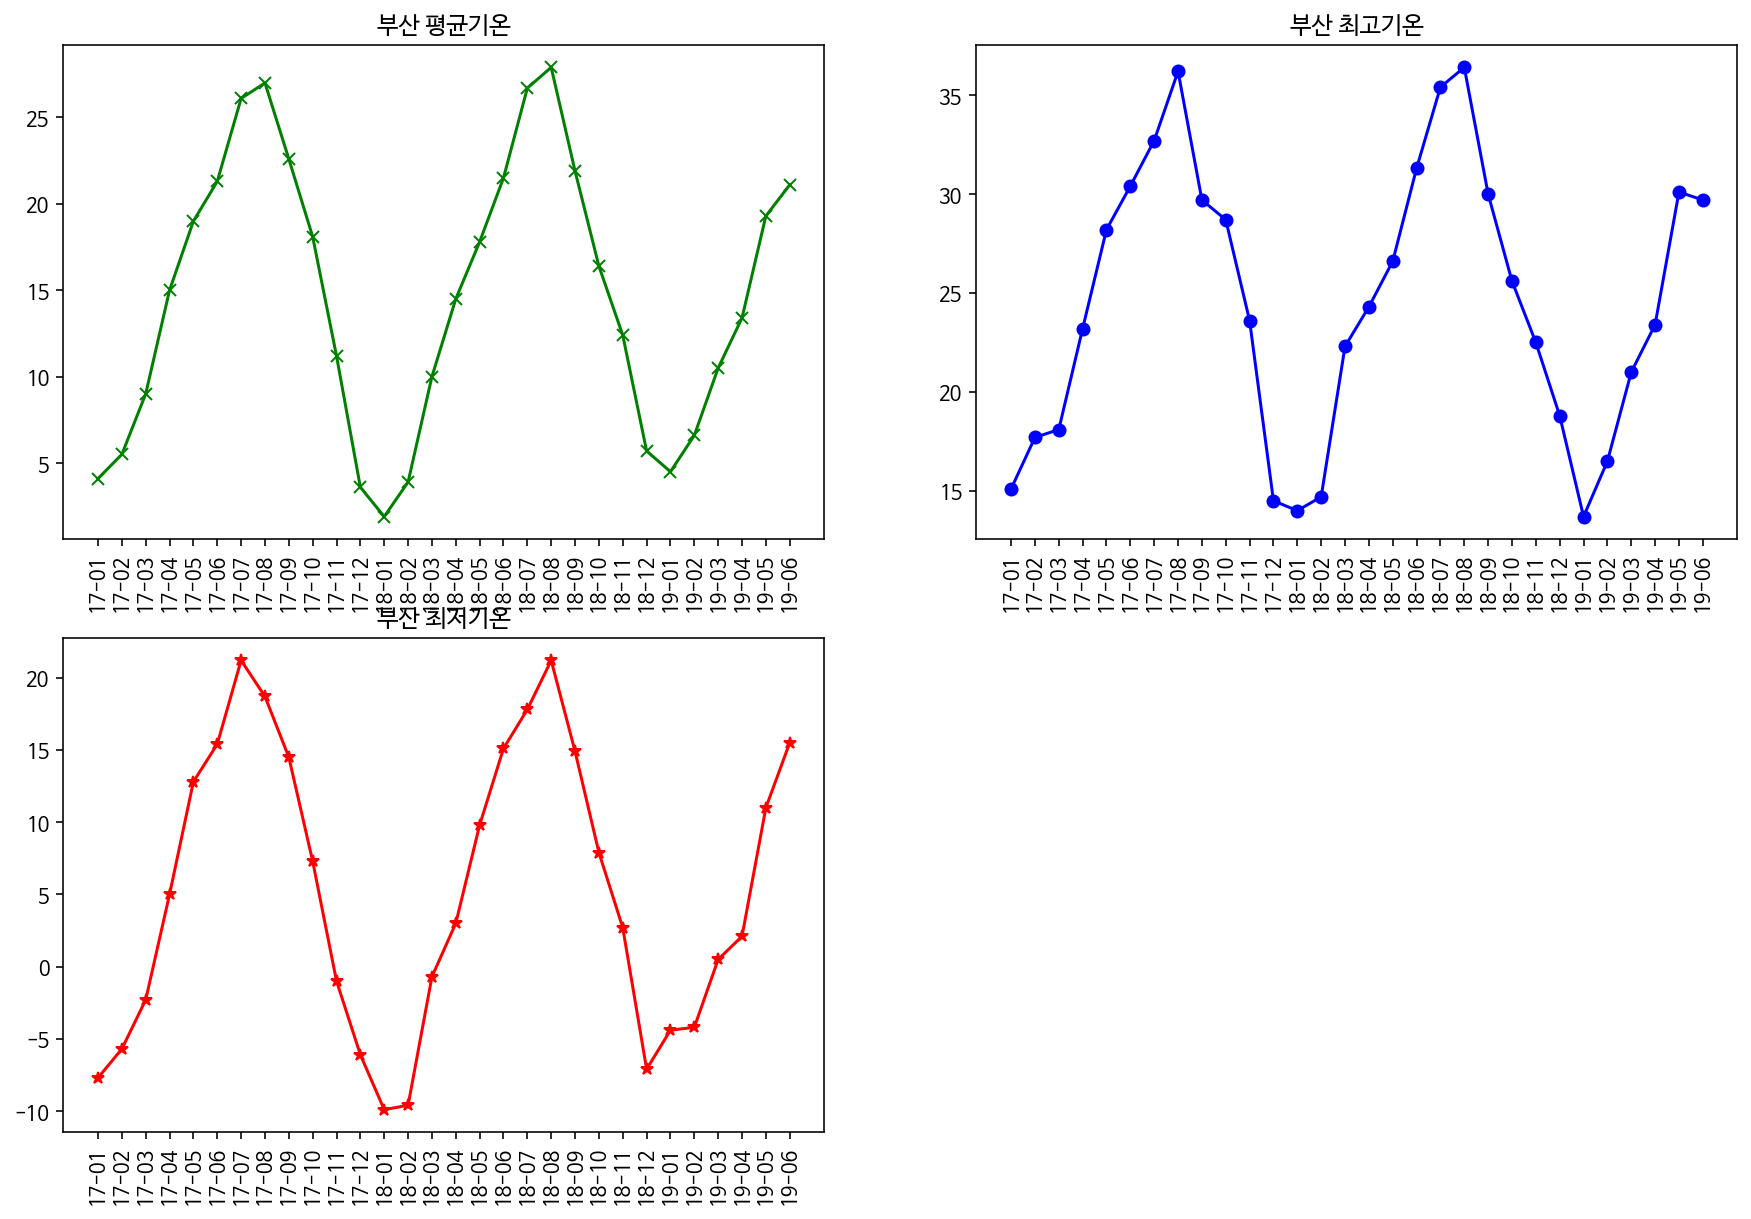

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.plot(df['평균'], 'gx-')
ax1.set_title('부산 평균기온') 
ax1.set_xticklabels(df.index.str[2:7], rotation=90)

ax2.plot(df['최고'], 'bo-') 
ax2.set_title('부산 최고기온') 
ax2.set_xticklabels(df.index.str[2:7], rotation=90)

ax3.plot(df['최저'], 'r*-')
ax3.set_title('부산 최저기온') 
ax3.set_xticklabels(df.index.str[2:7], rotation=90)

plt.show()

#### 여러가지 종류의 그래프 그리기
+ 막대그래프
 - .plot(kind='bar') , plot(kind='barn')
+ 히스토그래프 
 - .hist(열, bins=간격, rwidth=막대너비)
+ 산점도그래프
 - 두 변수 간의 관계 표시
 - .scatter(열1, 열2)

##### 막대그래프

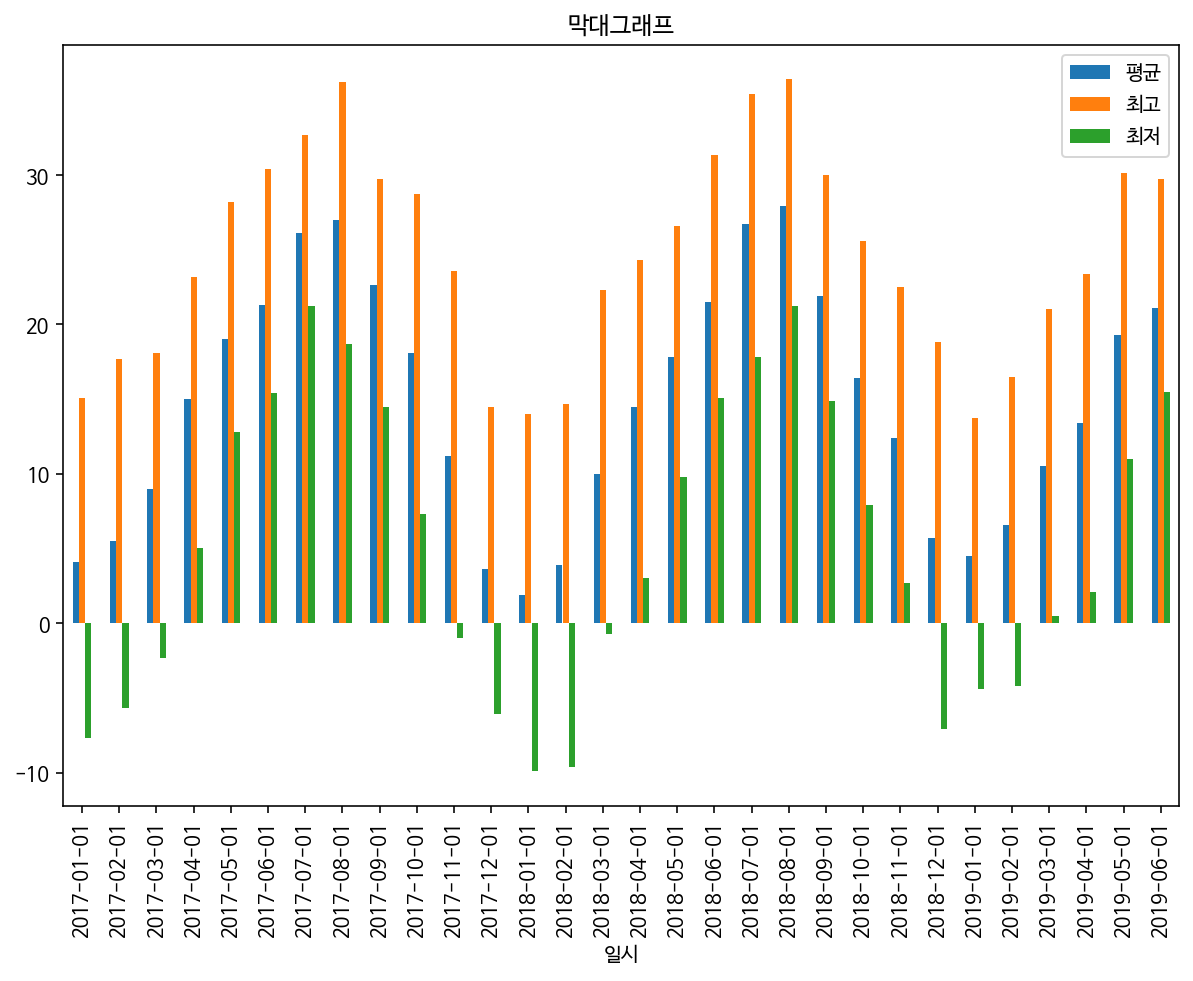

In [ ]:
#세로 막대형
df.plot(kind='bar', figsize=(10,7))
plt.title('막대그래프')
plt.show()

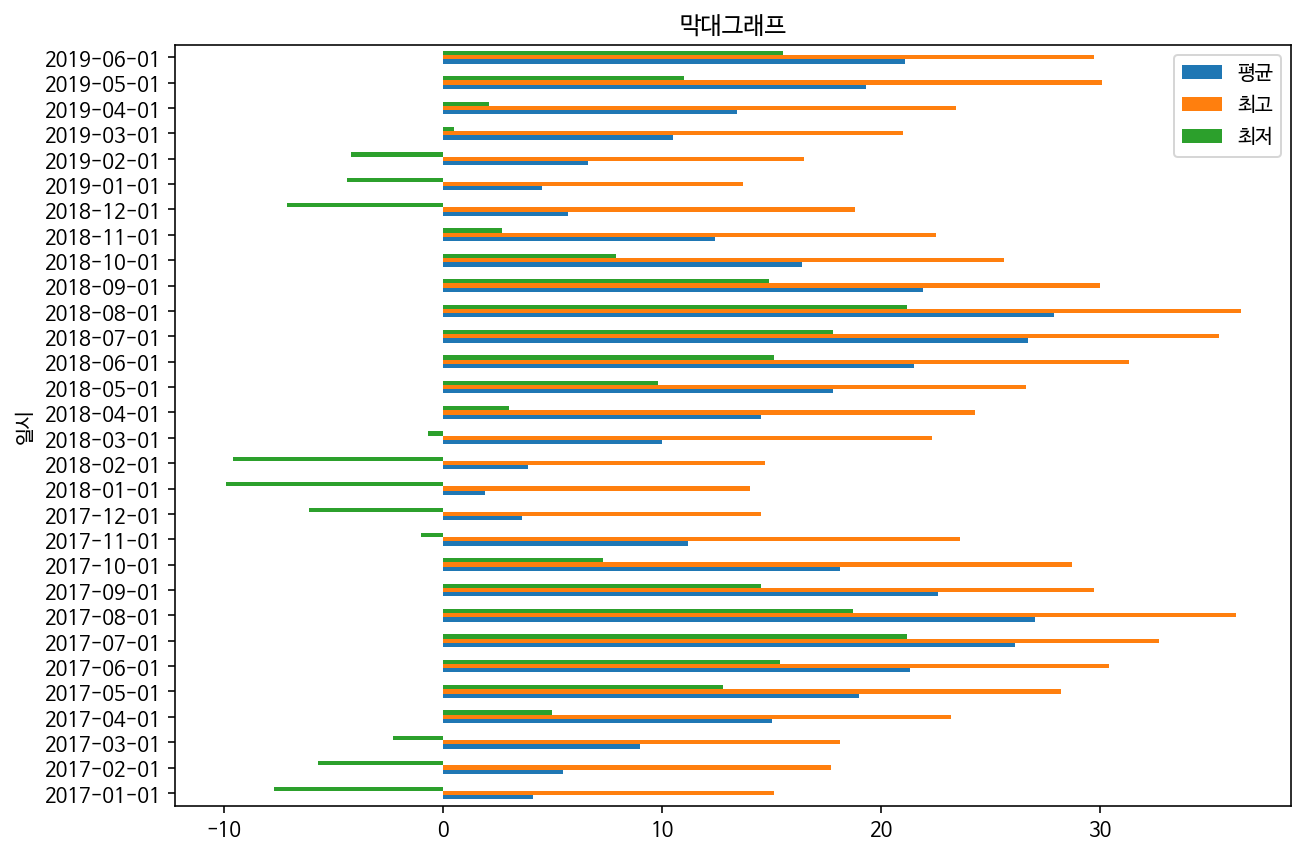

In [ ]:
#가로 막대형
df.plot(kind='barh', figsize=(10,7))
plt.title('막대그래프')
plt.show()

#####해결문제


---
해결문제) 평균기온이 높은 날부터 순서대로 그래프를 작성하시오.


---




In [ ]:
dfmax = pd.DataFrame(df['평균'])

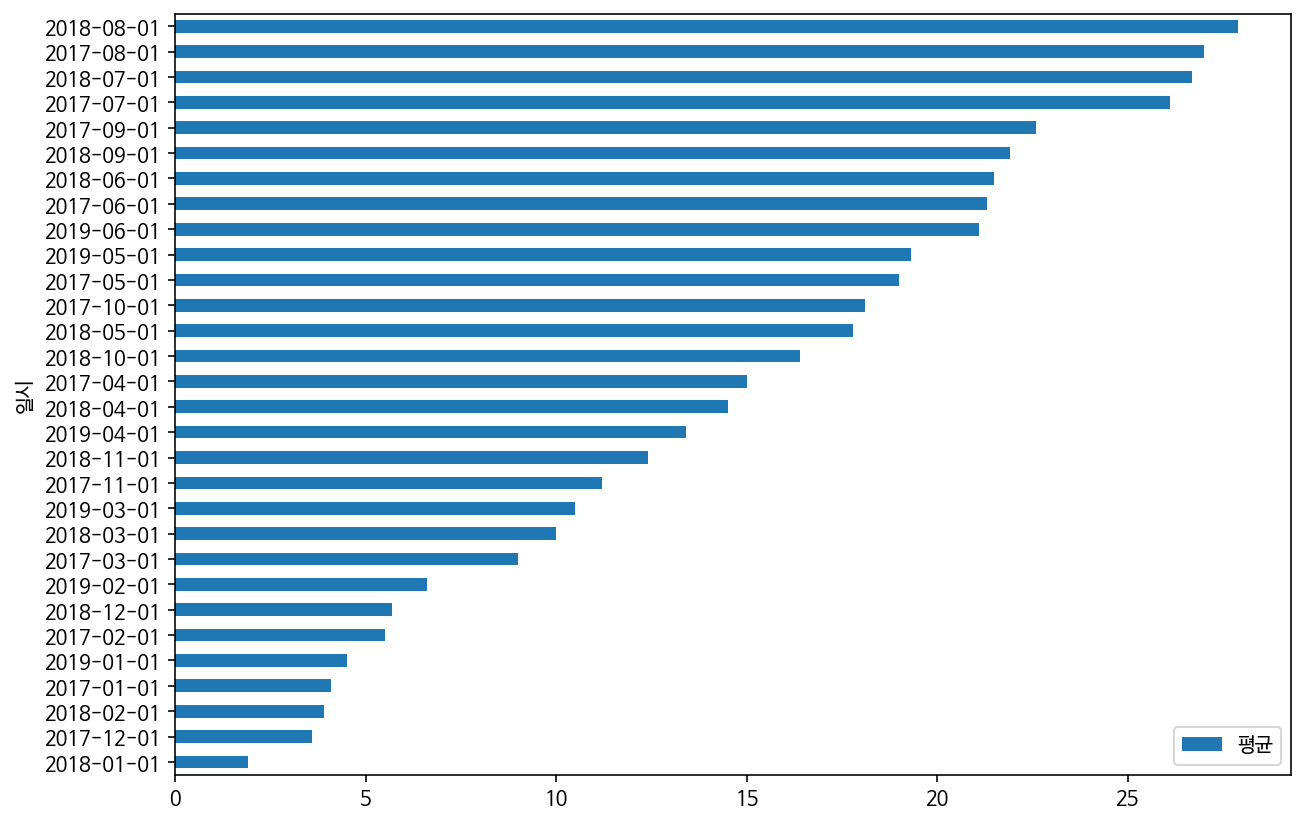

In [ ]:
dfmax.sort_values(by='평균').plot(kind='barh', figsize=(10,7))
plt.show()

##### 히스토그램

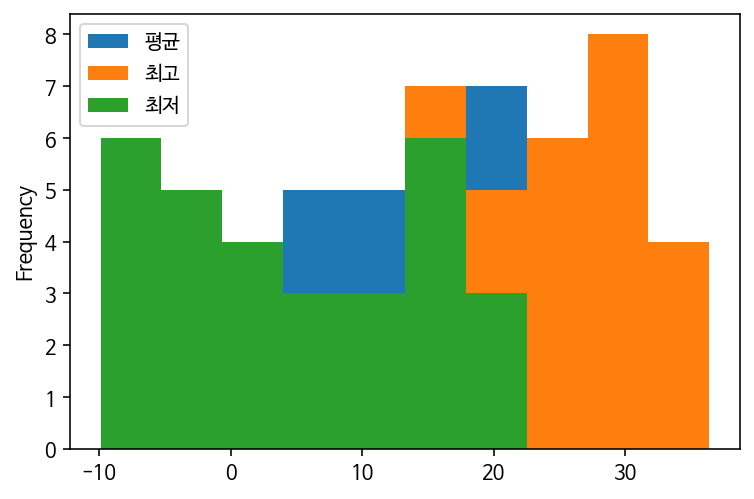

In [15]:
df.plot.hist()
plt.show()

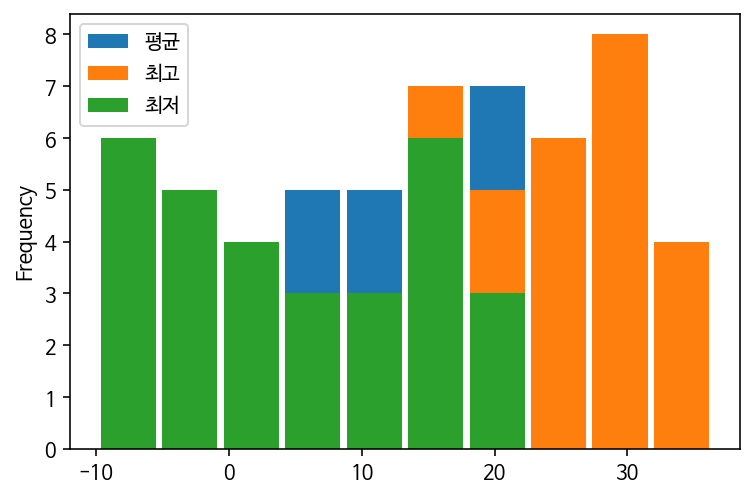

In [14]:
df.plot.hist(rwidth=0.9)
plt.show()

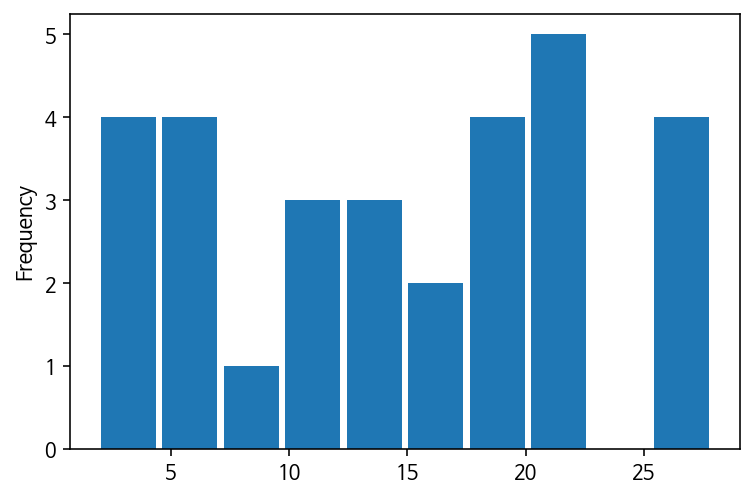

In [ ]:
#히스토그램 그리기
df['평균'].plot.hist(rwidth=0.9)
plt.show()

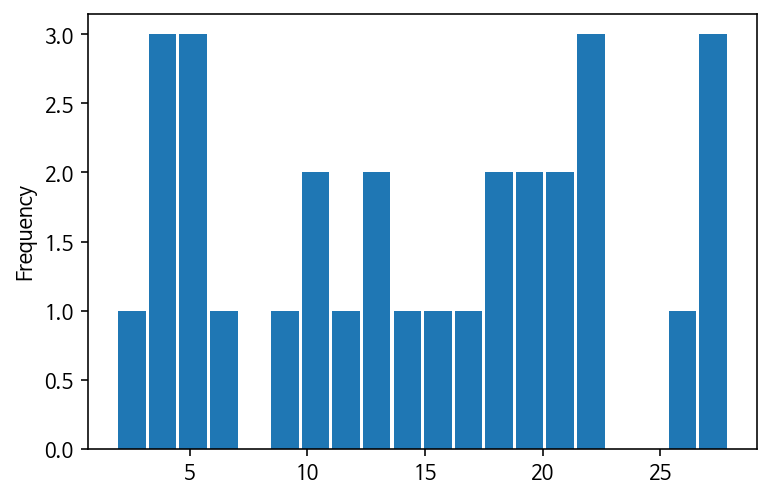

In [ ]:
#히스토그램 그리기
df['평균'].plot.hist(rwidth=0.9, bins=20)
plt.show()

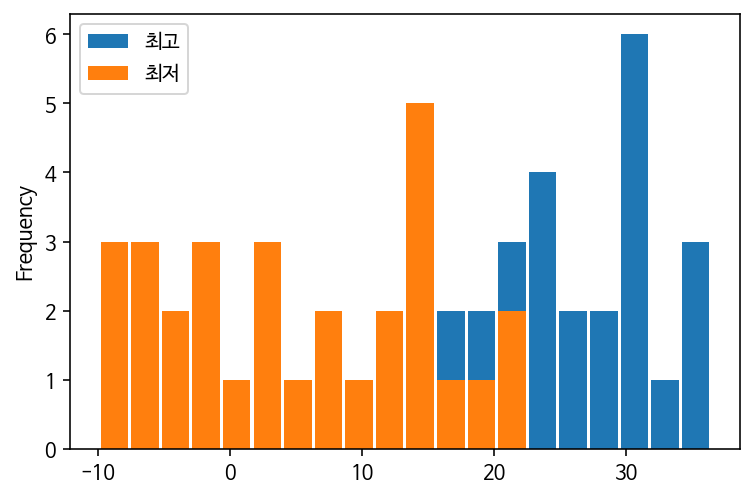

In [ ]:
#히스토그램 그리기
df[['최고','최저']].plot.hist(rwidth=0.9, bins=20) 
plt.show()

##### 산점도 그래프

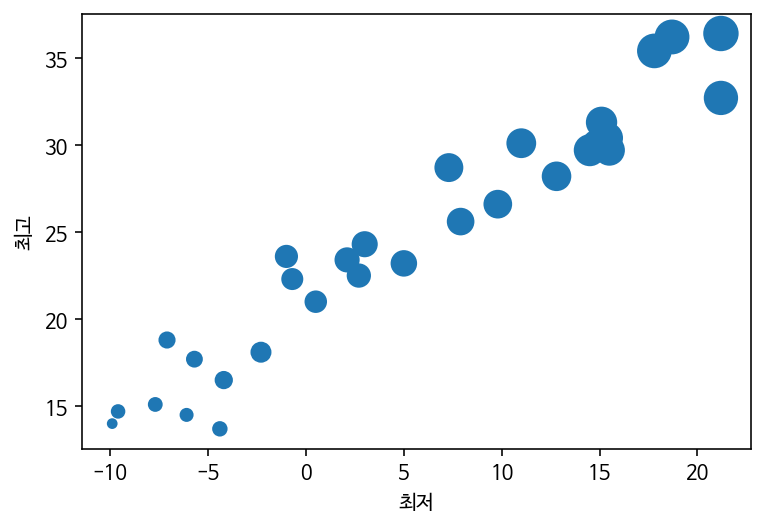

In [16]:
df.plot.scatter(x='최저', y='최고', s=df['평균']*10)
plt.show()

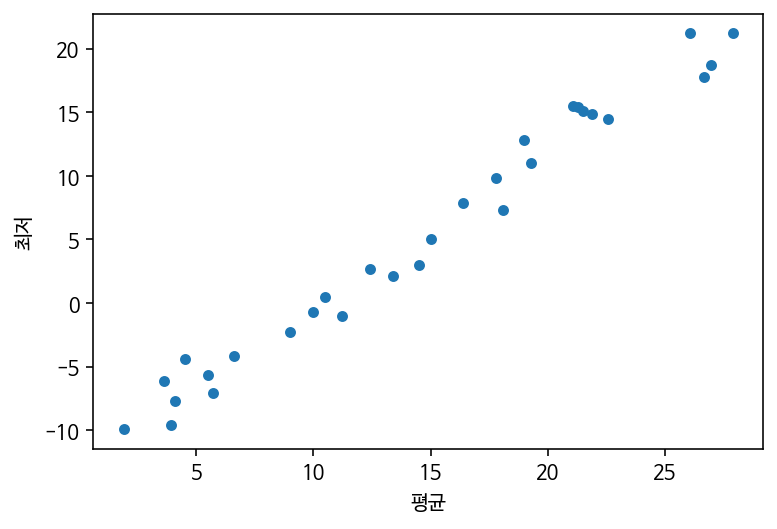

In [ ]:
df.plot.scatter(x='평균', y='최저')
plt.show()

##### 박스 그래프

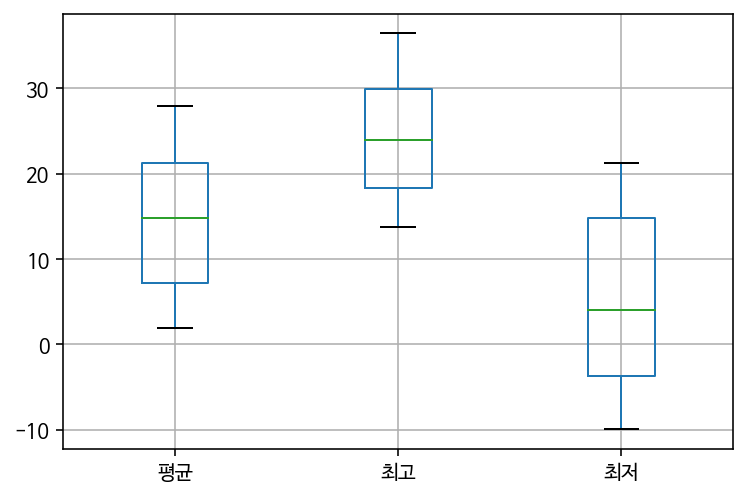

In [ ]:
df.boxplot(column=['평균', '최고', '최저'])
plt.show()

##### 해결문제


---
해결문제) 2017년 부산쓰레기발생 자료를 이용하여 재활용 처리량이 많은 지역 순서대로 수평 막대 그래프를 그리시오.


---




In [18]:
df = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/05/부산쓰레기발생2017년.csv', encoding='cp949')

In [21]:
df

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,매립처리량,연간(톤),3034,2323,1653,1219,17393,9195,8042,10498,5251,3089,7240,9742,1831,2205,9937,2290
1,매립처리량,일일(톤),8,7,5,3,48,25,22,29,14,8,20,27,5,6,27,6
2,소각처리량,연간(톤),13729,10446,8297,8651,538,17,158,97,31924,32671,222,4788,14521,11987,216,13687
3,소각처리량,일일(톤),38,29,23,24,2,0,0,0,87,89,1,13,40,33,0,37
4,재활용처리량,연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
5,재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42
6,음식물류발생량,연간(톤),5154,8779,6399,9522,27119,20128,15548,24201,40043,21183,21273,10810,14122,13289,24161,16648
7,음식물류발생량,일일(톤),14,24,18,26,74,55,43,66,110,58,58,30,39,36,66,46


In [25]:
df21 = pd.DataFrame(df.loc[5]).T
df21

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
5,재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [23]:
df22 = df.loc[[5]]
df22

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
5,재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [26]:
df22 = df22.T
df22

,5
항목,재활용처리량
구분,일일(톤)
중구,25
서구,58
동구,49
영도구,68
부산진구,242
동래구,155
남구,159
북구,175


In [27]:
df22.columns = ['재활용처리량']
df22.head(2)

,재활용처리량
항목,재활용처리량
구분,일일(톤)


In [31]:
df22.index = [item.strip() for item in df22.index]

In [32]:
df22.index

Index(['항목', '구분', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'],
      dtype='object')

In [33]:
df22 = df22.drop(['항목', '구분'], axis = 0)

In [34]:
df22

,재활용처리량
중구,25
서구,58
동구,49
영도구,68
부산진구,242
동래구,155
남구,159
북구,175
해운대구,177
사하구,194


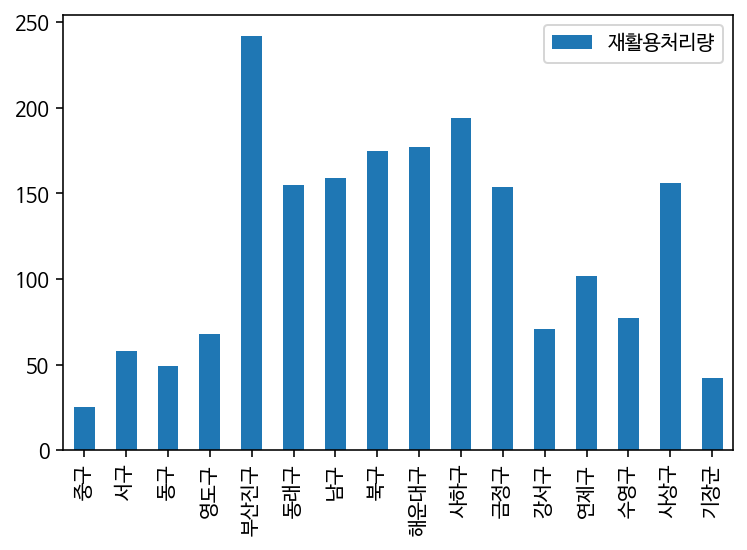

In [35]:
df22.plot(kind = 'bar')

In [37]:
df.head(2)

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,매립처리량,연간(톤),3034,2323,1653,1219,17393,9195,8042,10498,5251,3089,7240,9742,1831,2205,9937,2290
1,매립처리량,일일(톤),8,7,5,3,48,25,22,29,14,8,20,27,5,6,27,6


In [60]:
dft = df.reset_index()


In [63]:
dft.columns

Index(['항목', '구분', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'],
      dtype='object')

In [65]:
dft['내용'] = dft['항목'].str[:] + dft['구분'].str[:]


In [67]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목      8 non-null      object
 1   구분      8 non-null      object
 2   중구      8 non-null      int64 
 3   서구      8 non-null      int64 
 4   동구      8 non-null      int64 
 5   영도구     8 non-null      int64 
 6   부산진구    8 non-null      int64 
 7   동래구     8 non-null      int64 
 8   남구      8 non-null      int64 
 9   북구      8 non-null      int64 
 10  해운대구    8 non-null      int64 
 11  사하구     8 non-null      int64 
 12  금정구     8 non-null      int64 
 13  강서구     8 non-null      int64 
 14  연제구     8 non-null      int64 
 15  수영구     8 non-null      int64 
 16  사상구     8 non-null      int64 
 17  기장군     8 non-null      int64 
 18  내용      8 non-null      object
dtypes: int64(16), object(3)
memory usage: 1.3+ KB


In [68]:
dft = dft.set_index('내용')
dft.head(2)

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
내용,,,,,,,,,,,,,,,,,,
매립처리량연간(톤),매립처리량,연간(톤),3034,2323,1653,1219,17393,9195,8042,10498,5251,3089,7240,9742,1831,2205,9937,2290
매립처리량일일(톤),매립처리량,일일(톤),8,7,5,3,48,25,22,29,14,8,20,27,5,6,27,6


In [36]:
df.columns

Index(['항목', '구분 ', '중구 ', '서구 ', '동구 ', '영도구 ', '부산진구 ', '동래구 ', '남구 ', '북구 ',
       '해운대구', '사하구 ', '금정구 ', '강서구 ', '연제구 ', '수영구 ', '사상구 ', '기장군 '],
      dtype='object')

In [38]:
#컬럼명의 공백을 제거
df.columns = [item.strip()for item in df.columns]
df.columns

Index(['항목', '구분', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'],
      dtype='object')

In [39]:
df = df.set_index('항목')
df

,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
항목,,,,,,,,,,,,,,,,,
매립처리량,연간(톤),3034,2323,1653,1219,17393,9195,8042,10498,5251,3089,7240,9742,1831,2205,9937,2290
매립처리량,일일(톤),8,7,5,3,48,25,22,29,14,8,20,27,5,6,27,6
소각처리량,연간(톤),13729,10446,8297,8651,538,17,158,97,31924,32671,222,4788,14521,11987,216,13687
소각처리량,일일(톤),38,29,23,24,2,0,0,0,87,89,1,13,40,33,0,37
재활용처리량,연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42
음식물류발생량,연간(톤),5154,8779,6399,9522,27119,20128,15548,24201,40043,21183,21273,10810,14122,13289,24161,16648
음식물류발생량,일일(톤),14,24,18,26,74,55,43,66,110,58,58,30,39,36,66,46


In [41]:
df.index

Index(['매립처리량', '매립처리량', '소각처리량', '소각처리량', '재활용처리량', '재활용처리량', '음식물류발생량',
       '음식물류발생량'],
      dtype='object', name='항목')

In [46]:
df0 = df.loc[['재활용처리량']]
df0

,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
항목,,,,,,,,,,,,,,,,,
재활용처리량,연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [47]:
df0 = df0.reset_index()
df0

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,재활용처리량,연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
1,재활용처리량,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [48]:
df0 = df0.drop('항목',axis=1)
df0

,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
1,일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [49]:
df0 = df0.set_index('구분')
df0

,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
구분,,,,,,,,,,,,,,,,
연간(톤),9082,21301,17968,24616,88453,56526,57921,63879,64667,70923,56153,25977,37115,28135,57110,15170
일일(톤),25,58,49,68,242,155,159,175,177,194,154,71,102,77,156,42


In [50]:
df0 = df0.T
df0

구분,연간(톤),일일(톤)
중구,9082,25
서구,21301,58
동구,17968,49
영도구,24616,68
부산진구,88453,242
동래구,56526,155
남구,57921,159
북구,63879,175
해운대구,64667,177
사하구,70923,194


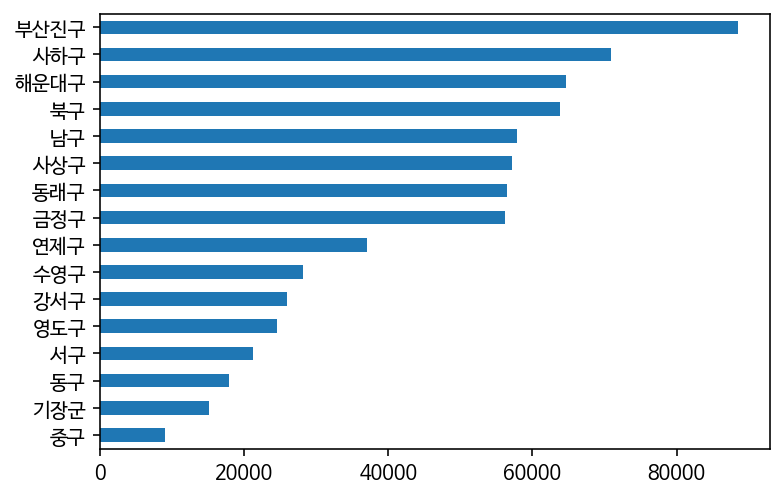

In [56]:
df0['연간(톤)'].sort_values().plot(kind = 'barh')

### seaborn 라이브러리 사용
+ Seaborn
 - Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
 - 기본적인 시각화 기능은 Matplotlib 패키지에 따르며 통계 기능은 Statsmodels 패키지를 사용
- http://seaborn.pydata.org/

In [83]:
#seaborn 라이브러리를 이용한 시각화
import seaborn as sns

In [73]:
df = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/05/부산시기온.csv')
df.head()

,일시,평균,최고,최저
0,2017-01-01,4.1,15.1,-7.7
1,2017-02-01,5.5,17.7,-5.7
2,2017-03-01,9.0,18.1,-2.3
3,2017-04-01,15.0,23.2,5.0
4,2017-05-01,19.0,28.2,12.8


##### .distplot()


```
sns.distplot(x, kde=True, rug=True)
```

+ 1차원 실수 분포 플롯
+ 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용
 - 러그 : 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준
 - 커널 밀도 : 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법

In [74]:
df['등급'] = ''
df.head(2)

,일시,평균,최고,최저,등급
0,2017-01-01,4.1,15.1,-7.7,
1,2017-02-01,5.5,17.7,-5.7,


In [75]:
df.loc[(df['평균'] >= 0) & (df['평균'] <= 10), '등급'] = 1
df.loc[(df['평균'] >10) & (df['평균'] <= 25), '등급'] = 2
df.loc[(df['평균'] >25) & (df['평균'] <= 30), '등급'] = 3
df.head()

,일시,평균,최고,최저,등급
0,2017-01-01,4.1,15.1,-7.7,1
1,2017-02-01,5.5,17.7,-5.7,1
2,2017-03-01,9.0,18.1,-2.3,1
3,2017-04-01,15.0,23.2,5.0,2
4,2017-05-01,19.0,28.2,12.8,2


In [78]:
df = df.set_index('일시')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      30 non-null     object 
 1   평균      30 non-null     float64
 2   최고      30 non-null     float64
 3   최저      30 non-null     float64
 4   등급      30 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.3+ KB


In [79]:
df[df.index.str[5:7] == '01']

,평균,최고,최저,등급
일시,,,,
2017-01-01,4.1,15.1,-7.7,1
2018-01-01,1.9,14.0,-9.9,1
2019-01-01,4.5,13.7,-4.4,1


In [80]:
df['등급']

일시
2017-01-01    1
2017-02-01    1
2017-03-01    1
2017-04-01    2
2017-05-01    2
2017-06-01    2
2017-07-01    3
2017-08-01    3
2017-09-01    2
2017-10-01    2
2017-11-01    2
2017-12-01    1
2018-01-01    1
2018-02-01    1
2018-03-01    1
2018-04-01    2
2018-05-01    2
2018-06-01    2
2018-07-01    3
2018-08-01    3
2018-09-01    2
2018-10-01    2
2018-11-01    2
2018-12-01    1
2019-01-01    1
2019-02-01    1
2019-03-01    2
2019-04-01    2
2019-05-01    2
2019-06-01    2
Name: 등급, dtype: object

In [86]:
df['등급'].value_counts()

2    16
1    10
3     4
Name: 등급, dtype: int64

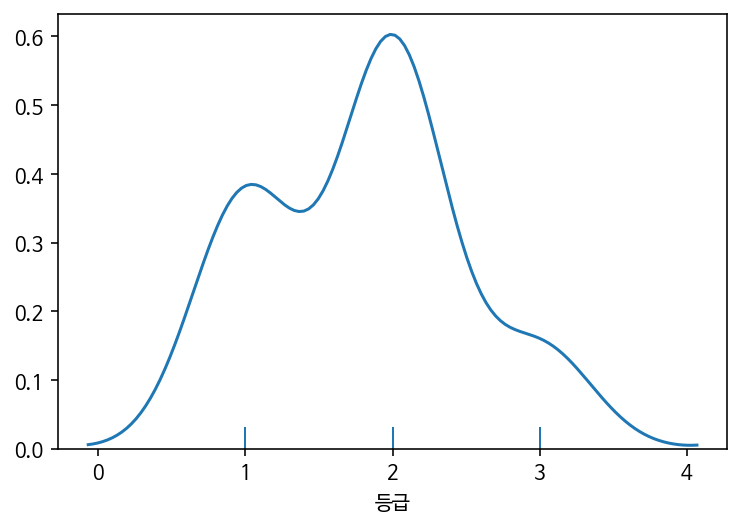

In [84]:
sns.distplot(df['등급'], kde=True, rug=True, hist=False)
plt.show()

##### .countplot()


```
sns.countplot(x)
```
+ 각 카테고리 값별로 데이터가 얼마나 있는지 표시

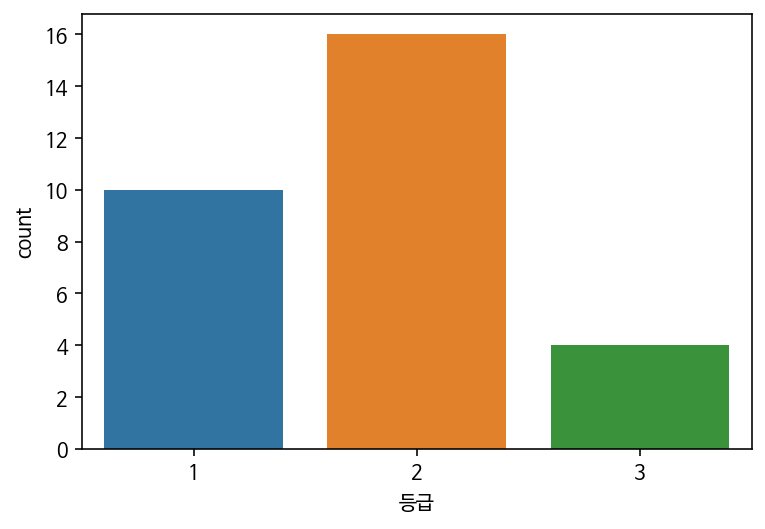

In [88]:
sns.countplot(df['등급'])
plt.show()

##### .barplot()


```
sns.barplot(x=열, y=열, data=대이터프레임)
```
+ 각 카테고리 값별로 y에 지정한 평균을 계산하여 보여줌

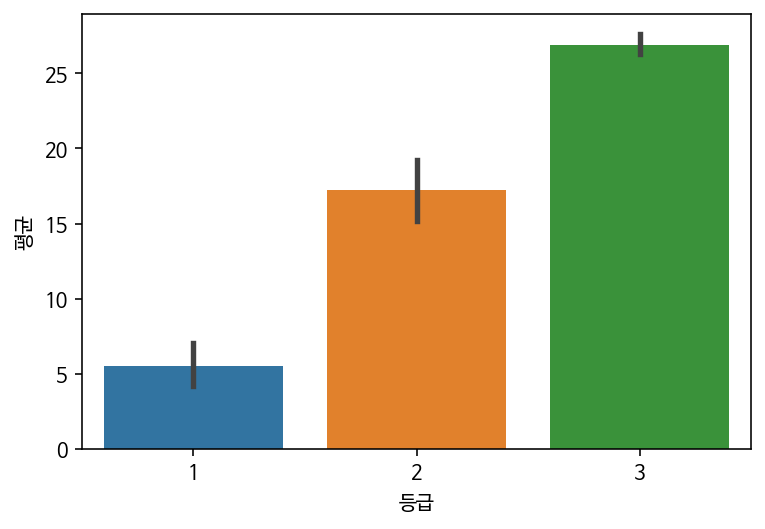

In [89]:
sns.barplot(x='등급', y='평균', data=df)
plt.show()

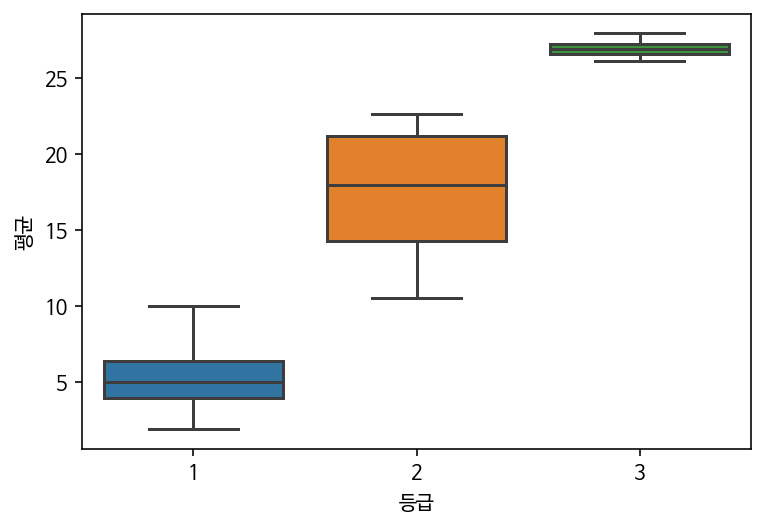

In [90]:
sns.boxplot(x='등급', y='평균', data=df)
plt.show()

##### .lmplot()


```
sns.lmplot(x=열1, y=열2, data=데이터프레임)
```
+ 선형관계확인

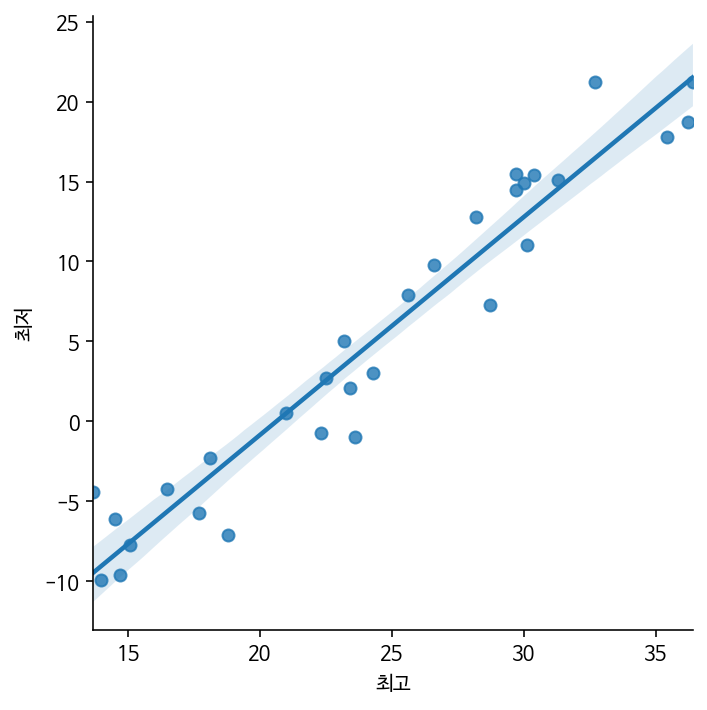

In [91]:
sns.lmplot(x='최고', y='최저', data=df)
plt.show()

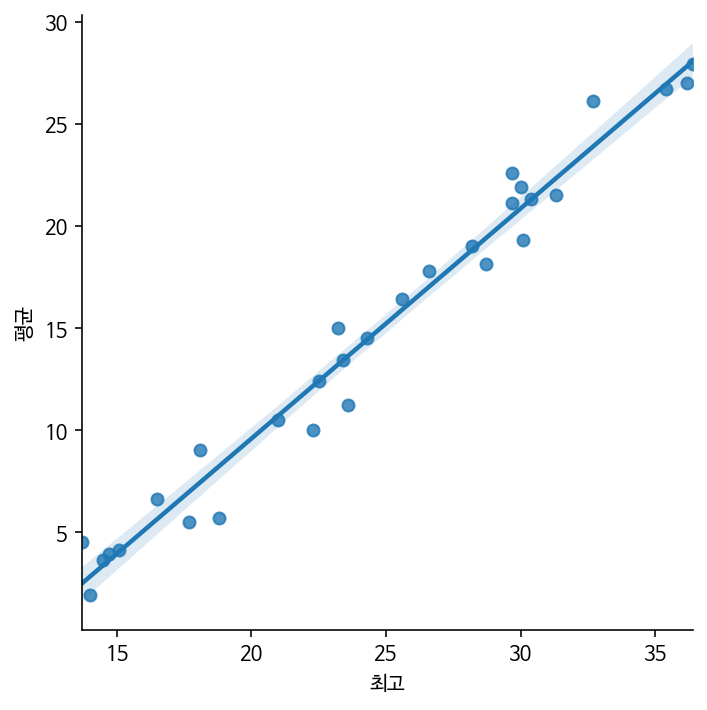

In [92]:
sns.lmplot(x='최고', y='평균', data=df)
plt.show()

##### .pairplot()


```
sns.pairplot(데이터프레임)
```
+ 각 데이터 열의 조합에 대해 스캐터 플롯
+ 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램
+ 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있음

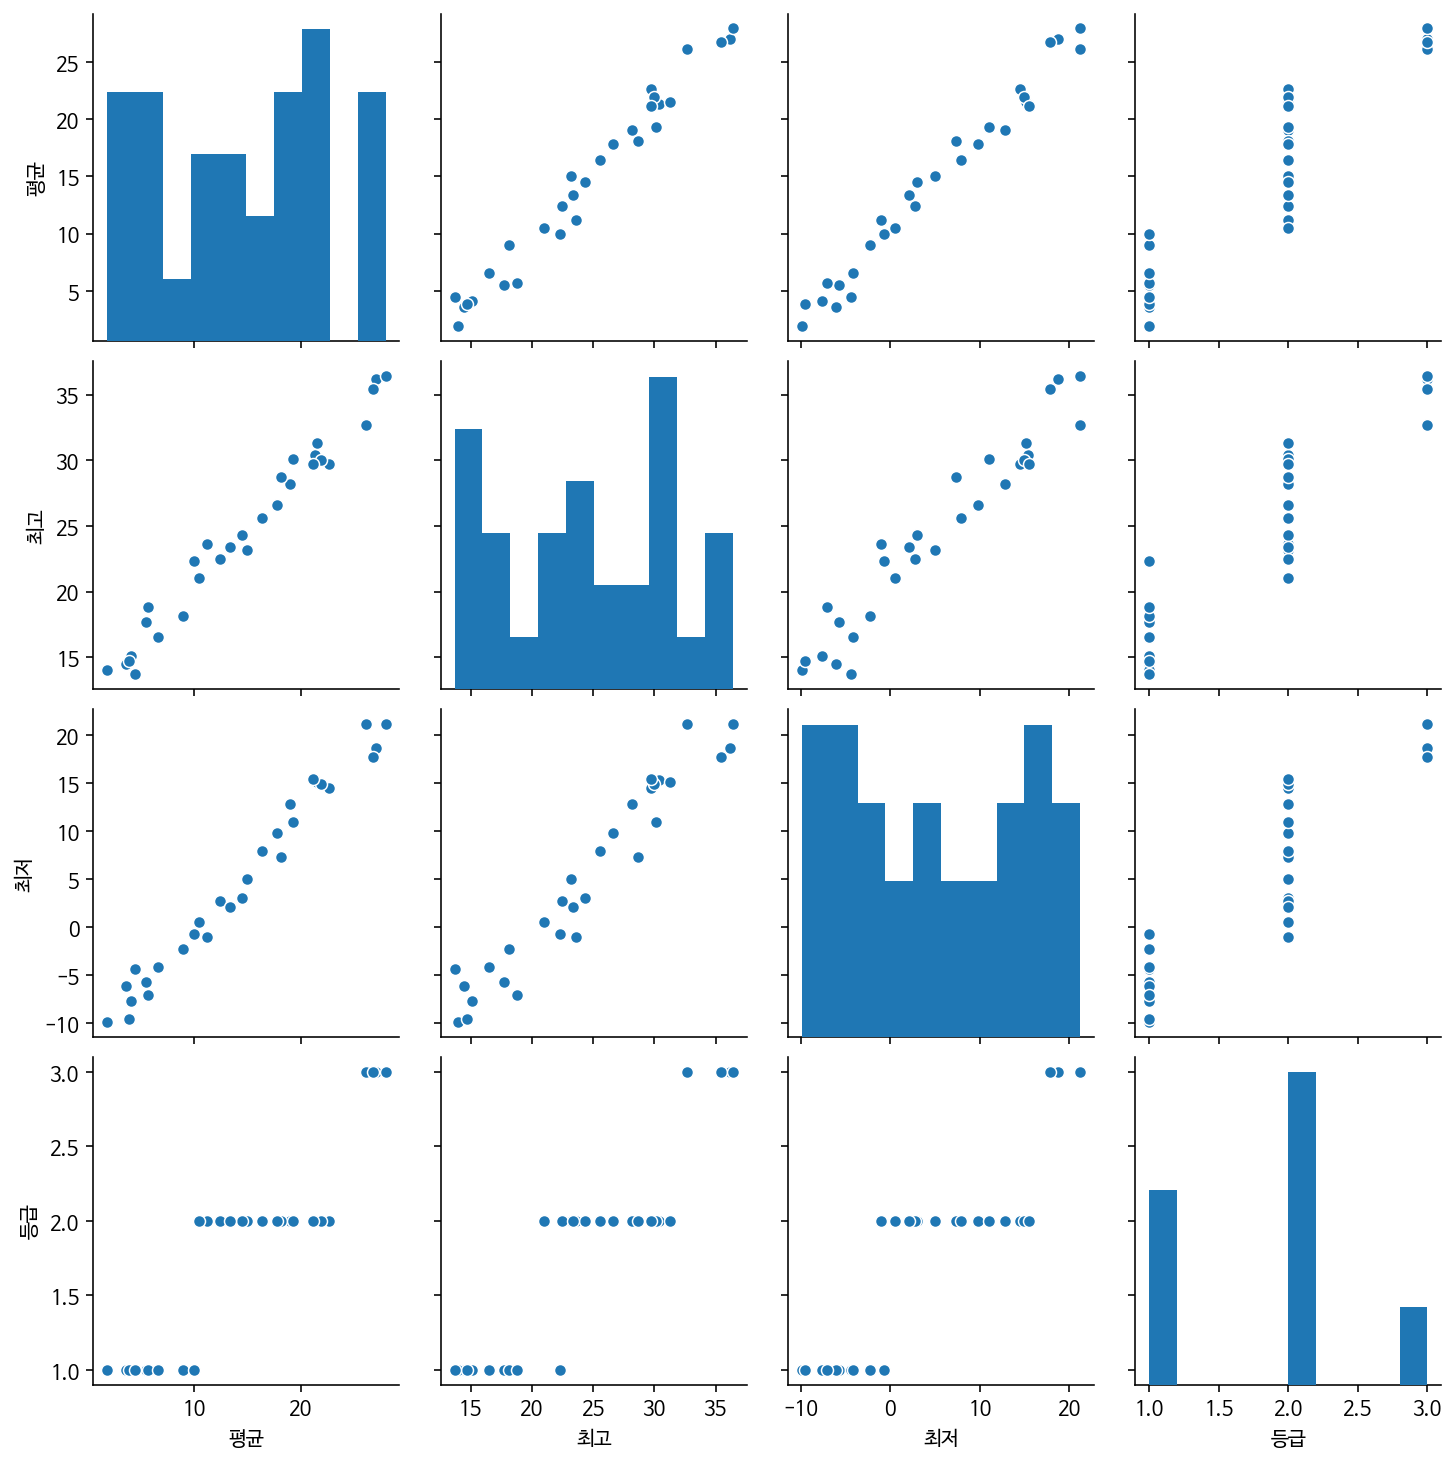

In [ ]:
sns.pairplot(df)
plt.show()

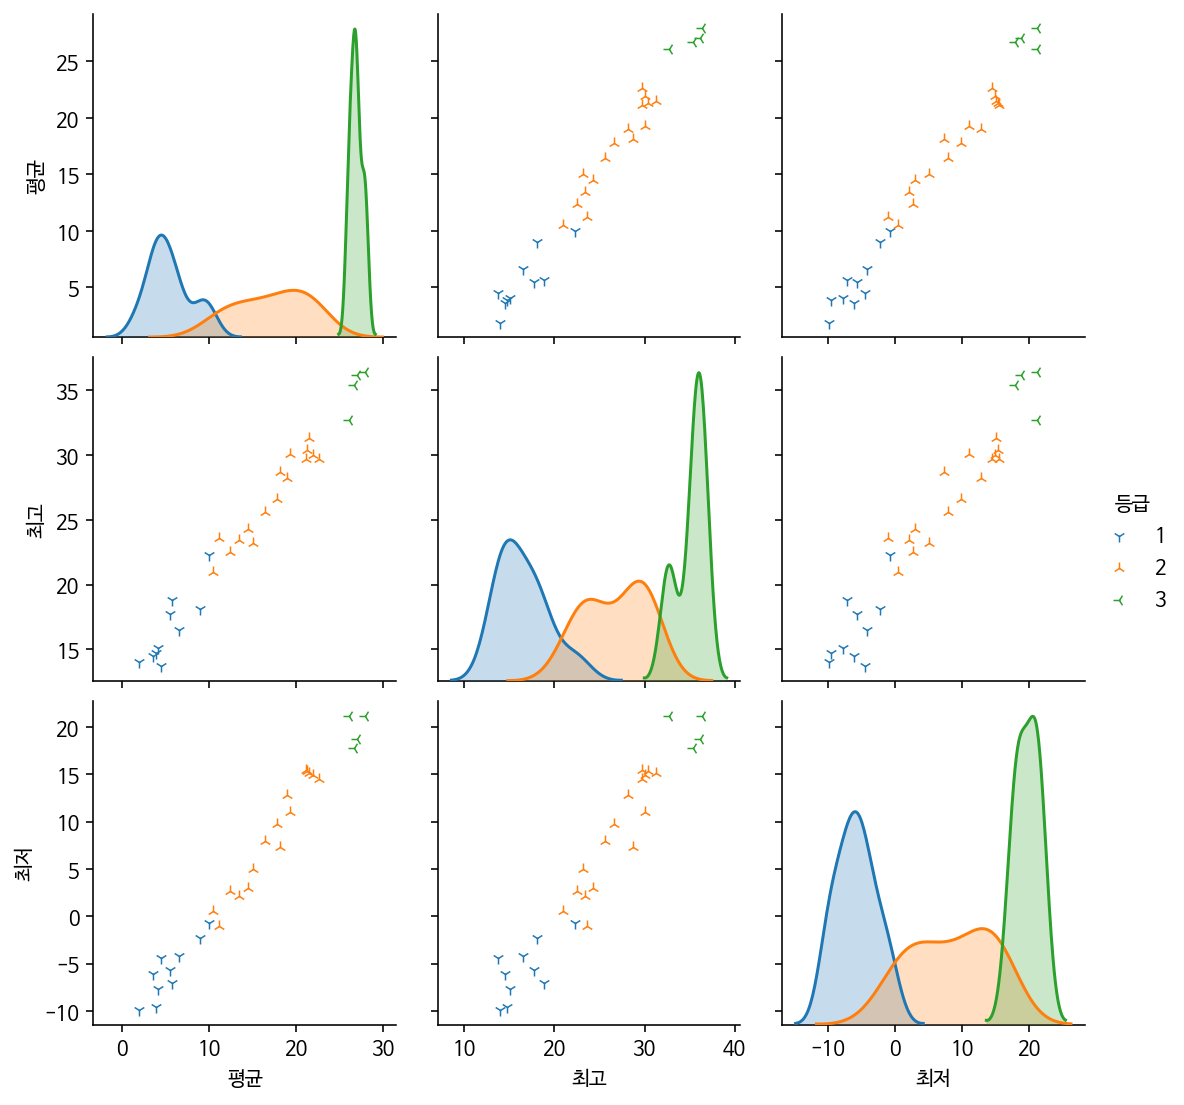

In [ ]:
sns.pairplot(df,hue="등급", markers=["1", "2", "3"])
plt.show()

##### .jointplot()


```
sns.jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```
+ 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용
+ 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램
+ 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램
 - kind='scatter' : 스캐터 플롯
 - kind='kde' : 커널 밀도 히스토그램
 - kind='hex' : 육각그래프

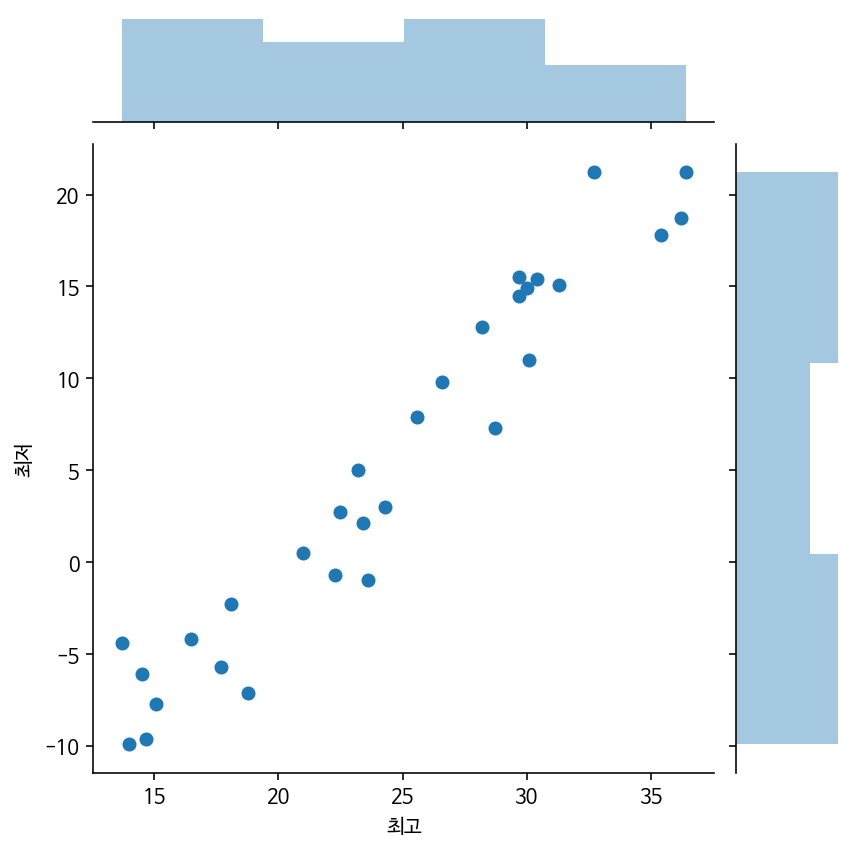

In [ ]:
sns.jointplot(x="최고", y="최저", data=df, kind='scatter')
plt.show()

##### .heatmap()


```
sns.heatmap(데이터프레임)
```
+ ㅅ

In [93]:
df.head()

,평균,최고,최저,등급
일시,,,,
2017-01-01,4.1,15.1,-7.7,1
2017-02-01,5.5,17.7,-5.7,1
2017-03-01,9.0,18.1,-2.3,1
2017-04-01,15.0,23.2,5.0,2
2017-05-01,19.0,28.2,12.8,2


In [94]:
df.corr()

,평균,최고,최저
평균,1.000000,0.986821,0.988610
최고,0.986821,1.000000,0.965836
최저,0.988610,0.965836,1.000000


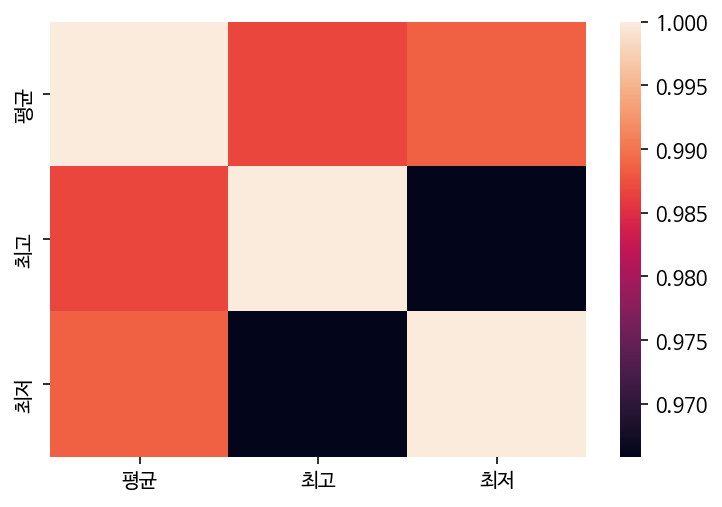

In [ ]:
sns.heatmap(df.corr())
plt.show()

#### 해결문제


---
해결문제) 부산재활용처리량.xlsx자료를 이용하여 부산시의 재활용처리량 그래프를 작성하시오.


---



In [96]:
dfg = pd.read_excel('/content/drive/My Drive/PythonWork/PythonBasic/05/부산재활용처리량.xlsx')

In [97]:
dfg.head(2)

,항목,위도,경도,재활용처리량
0,중구,35.106609,129.030064,25
1,서구,35.097924,129.022010,58


In [ ]:
dfg.columns

Index(['항목', '위도', '경도', '재활용처리량'], dtype='object')

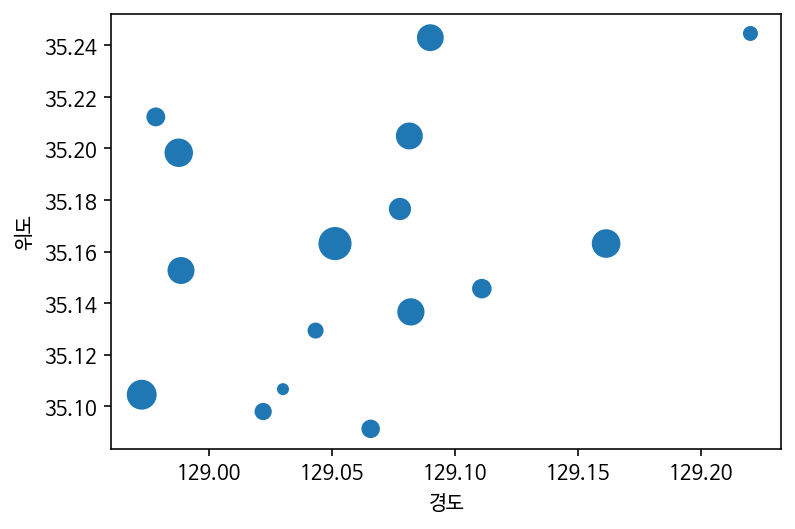

In [98]:
dfg.plot.scatter(x='경도', y='위도', s=dfg['재활용처리량'])
plt.show()